### Methodology
* We will train a model with different hyperparameters using the train dataset.
* We will do hyperparameter tuning using the validation dataset.
* we will also tune the threshold for different models using the validation set.
* Our goal is to maximise recall under the constraint that precision should be above 90%.

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
validation_dataset = pd.read_csv('validation.csv')

In [3]:
train_dataset

Preprocessed_text  Spam
0     new computers hi lyn hope things going better ...     0
1     contstraints shape smile stinson vince zimin b...     0
2     tropical cyclones dear yesterday mentioned vin...     0
3     university texas conference energy finance feb...     0
4     sokolov eis expenses hi kevin office thursday ...     0
...                                                 ...   ...
4004  anticipated assistant required mr ike ejoh ban...     1
4005  houston research opportunity dear vince would ...     0
4006  frank thanks given name employee energy power ...     0
4007  monte carlo techniques zimin course descriptio...     0
4008  conference volume hi vince resending request d...     0

[4009 rows x 2 columns]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()


In [5]:
X_train = tfidf.fit_transform(train_dataset['Preprocessed_text']).toarray()
y_train = train_dataset['Spam']

In [6]:
X_test = tfidf.transform(test_dataset['Preprocessed_text']).toarray()
y_test = test_dataset['Spam']

In [7]:
X_validation = tfidf.transform(validation_dataset['Preprocessed_text']).toarray()
y_validation = validation_dataset['Spam']

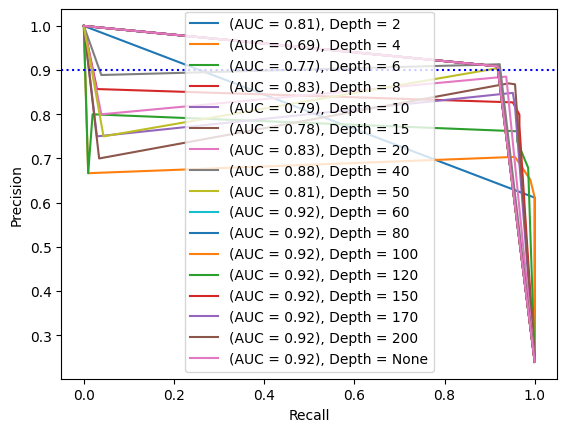

In [8]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
precision, recall, threshold, clf_DT = [], [], [], []
depths = [2,4,6,8,10,15,20,40,50,60,80,100, 120, 150, 170, 200, None]
for i in depths:
    clf_DT.append(DecisionTreeClassifier(max_depth = i, random_state = 562))
    clf_DT[-1].fit(X_train, y_train)
    y_scores = clf_DT[-1].predict_proba(X_validation)[:,1]
    precision.append(precision_recall_curve(y_validation, y_scores)[0])
    recall.append(precision_recall_curve(y_validation, y_scores)[1])
    threshold.append(precision_recall_curve(y_validation, y_scores)[2])
    area = auc(recall[-1], precision[-1])
    plt.plot(recall[-1], precision[-1], label=f'(AUC = {area:.2f}), Depth = ' + str(i))
plt.axhline(y = 0.9, color = 'b', linestyle = ':') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [9]:
clf_DT[depths.index(40)]

DecisionTreeClassifier(max_depth=40, random_state=562)

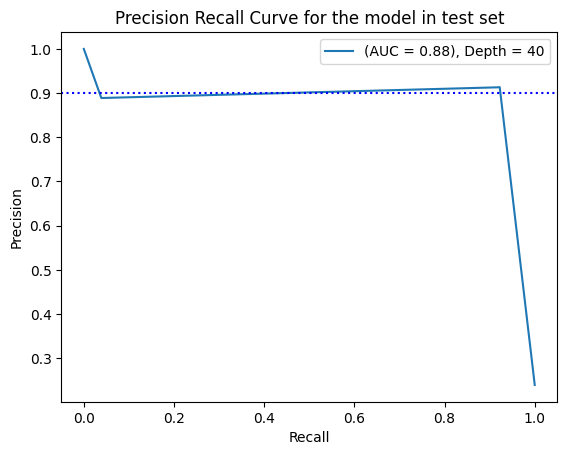

In [10]:
y_pred = clf_DT[depths.index(40)].predict_proba(X_validation)[:,1]
precision, recall, threshold = precision_recall_curve(y_validation, y_pred)
area = auc(recall, precision)
plt.plot(recall, precision, label=f'(AUC = {area:.2f}), Depth = {40:d}')
plt.axhline(y = 0.9, color = 'b', linestyle = ':') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for the model in test set')
plt.legend()

In [11]:
best_threshold = 0
best_precision = 0
best_recall = 0
for i in range(len(threshold)):
    if precision[i] >= 0.9:
        if best_recall < recall[i]:
            best_recall = recall[i]
            best_precision = precision[i]
            best_threshold = threshold[i]

In [12]:
print("Threshold: " + str(best_threshold))
print("Precision: " + str(best_precision))
print("Recall: " + str(best_recall))

Threshold: 0.3333333333333333
Precision: 0.9134615384615384
Recall: 0.9223300970873787


In [13]:
threshold_DT = best_threshold
best_clf_DT = clf_DT[depths.index(40)]

0.0 done.
0.1 done.
0.2 done.
0.30000000000000004 done.
0.4 done.
0.5 done.
0.6000000000000001 done.
0.7000000000000001 done.
0.8 done.
0.9 done.
1.0 done.


/home/kashyap/anaconda3/envs/Anuraj/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


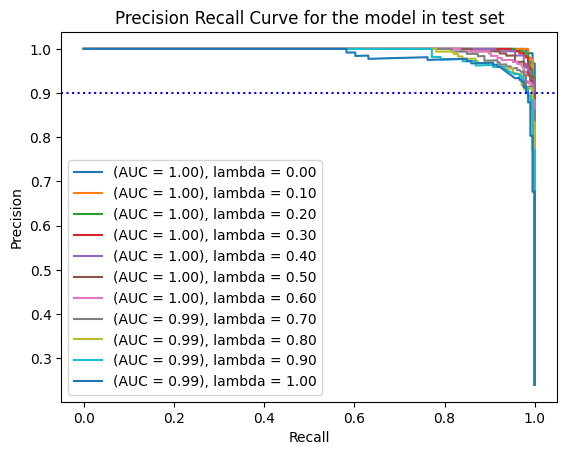

In [14]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
precision, recall, threshold, clf_logistic = [], [], [], []
lambdas = np.arange(0.0, 1.01, 0.1)

for i in np.arange(0.0, 1.01, 0.1):
    clf_logistic.append(LogisticRegression(l1_ratio = i, penalty = 'elasticnet', solver = 'saga', random_state = 65535))
    clf_logistic[-1].fit(X_train, y_train)
    y_scores = clf_logistic[-1].predict_proba(X_validation)[:,1]
    precision.append(precision_recall_curve(y_validation, y_scores)[0])
    recall.append(precision_recall_curve(y_validation, y_scores)[1])
    threshold.append(precision_recall_curve(y_validation, y_scores)[2])
    area = auc(recall[-1], precision[-1])
    plt.plot(recall[-1], precision[-1], label=f'(AUC = {area:.2f}), lambda = {i:.2f}')
    print(str(i) + " done.")
plt.axhline(y = 0.9, color = 'b', linestyle = ':') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for the model in test set')
plt.legend()

In [15]:
clf_logistic[list(lambdas).index(0.4)]

LogisticRegression(l1_ratio=0.4, penalty='elasticnet', random_state=65535,
                   solver='saga')

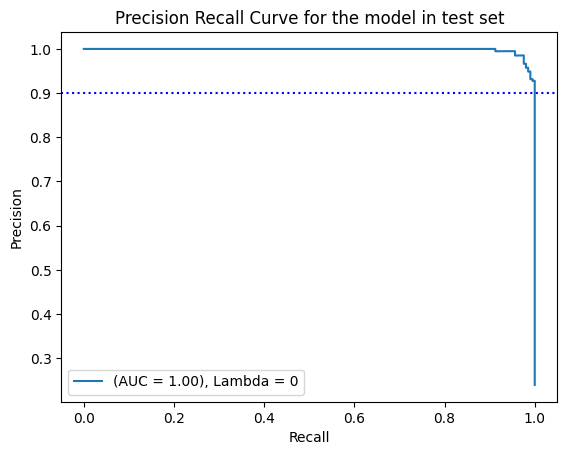

In [16]:
y_pred = clf_logistic[list(lambdas).index(0.4)].predict_proba(X_validation)[:,1]
precision, recall, threshold = precision_recall_curve(y_validation, y_pred)
area = auc(recall, precision)
plt.plot(recall, precision, label=f'(AUC = {area:.2f}), Lambda = {0:d}')
plt.axhline(y = 0.9, color = 'b', linestyle = ':') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for the model in test set')
plt.legend()

In [17]:
best_threshold = 0
best_precision = 0
best_recall = 0
for i in range(len(threshold)):
    if precision[i] >= 0.9:
        if best_recall < recall[i]:
            best_recall = recall[i]
            best_precision = precision[i]
            best_threshold = threshold[i]

In [18]:
print("Threshold: " + str(best_threshold))
print("Precision: " + str(best_precision))
print("Recall: " + str(best_recall))

Threshold: 0.3084853036655458
Precision: 0.9035087719298246
Recall: 1.0


In [19]:
threshold_logistic = best_threshold
best_clf_logistic = clf_logistic[list(lambdas).index(0.4)]

/home/kashyap/anaconda3/envs/Anuraj/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/home/kashyap/anaconda3/envs/Anuraj/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


0.0 done.
0.5 done.
1.0 done.
1.5 done.
2.0 done.
2.5 done.
3.0 done.
3.5 done.
4.0 done.
4.5 done.
5.0 done.


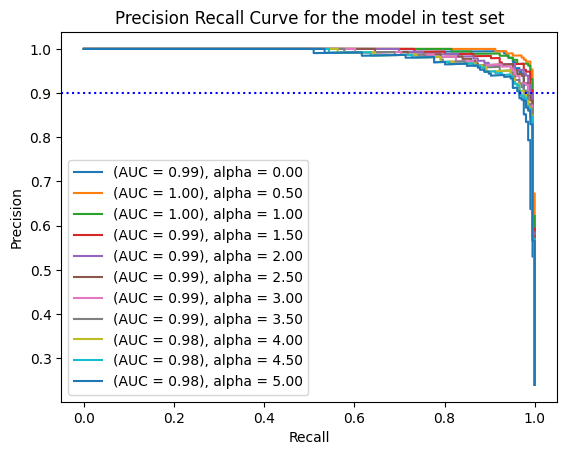

In [20]:


from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
precision, recall, threshold, clf_MNB = [], [], [], []
alphas = np.arange(0.0, 5.01, 0.5)

for i in alphas:
    clf_MNB.append(MultinomialNB(alpha = i))
    clf_MNB[-1].fit(X_train, y_train)
    y_scores = clf_MNB[-1].predict_proba(X_validation)[:,1]
    precision.append(precision_recall_curve(y_validation, y_scores)[0])
    recall.append(precision_recall_curve(y_validation, y_scores)[1])
    threshold.append(precision_recall_curve(y_validation, y_scores)[2])
    area = auc(recall[-1], precision[-1])
    plt.plot(recall[-1], precision[-1], label=f'(AUC = {area:.2f}), alpha = {i:.2f}')
    print(str(i) + " done.")
plt.axhline(y = 0.9, color = 'b', linestyle = ':') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for the model in test set')
plt.legend()

In [21]:
clf_MNB[list(alphas).index(1.5)]

MultinomialNB(alpha=1.5)

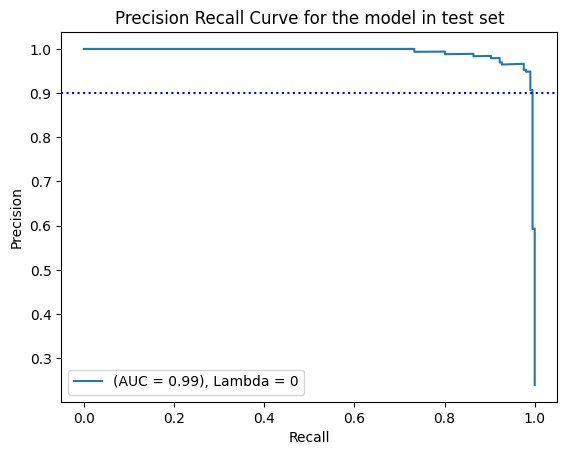

In [22]:
y_pred = clf_MNB[list(alphas).index(1.5)].predict_proba(X_validation)[:,1]
precision, recall, threshold = precision_recall_curve(y_validation, y_pred)
area = auc(recall, precision)
plt.plot(recall, precision, label=f'(AUC = {area:.2f}), Lambda = {0:d}')
plt.axhline(y = 0.9, color = 'b', linestyle = ':') 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for the model in test set')
plt.legend()

In [23]:
best_threshold = 0
best_precision = 0
best_recall = 0
for i in range(len(threshold)):
    if precision[i] >= 0.9:
        if best_recall < recall[i]:
            best_recall = recall[i]
            best_precision = precision[i]
            best_threshold = threshold[i]

In [24]:
print("Threshold: " + str(best_threshold))
print("Precision: " + str(best_precision))
print("Recall: " + str(best_recall))

Threshold: 0.030461845170351977
Precision: 0.9030837004405287
Recall: 0.9951456310679612


In [25]:
threshold_MNB = best_threshold
best_clf_MNB = clf_MNB[list(alphas).index(1.5)]

In [26]:
result = {"Model":["Decision Tree", "Logistic Regression", "Naive Bayes"]}

In [31]:
from sklearn.metrics import precision_score, recall_score

models = [best_clf_DT, best_clf_logistic, best_clf_MNB]
thresholds = [threshold_DT, threshold_logistic, threshold_MNB]
precision = []
recall = []
for i in range(3):
    predicted_prob = models[i].predict_proba(X_test)[:,1]
    prediction = np.zeros(predicted_prob.shape[0])
    for j in range(predicted_prob.shape[0]):
        if predicted_prob[j] >= thresholds[i]:
            prediction[j] = 1
    precision.append(precision_score(y_test, prediction))
    recall.append(recall_score(y_test, prediction))

In [34]:
result['Threshold'] = thresholds
result['Precision'] = precision
result['Recall'] = recall

The results on the test dataset is

In [36]:
pd.DataFrame(result)

Model  Threshold  Precision    Recall
0        Decision Tree   0.333333   0.920398  0.902439
1  Logistic Regression   0.308485   0.879828  1.000000
2          Naive Bayes   0.030462   0.891892  0.965854

By comparing we say that the optimal model is the decision tree model with threshold 0.33333